In [1]:
%matplotlib widget

import lotr.plotting as pltltr
import numpy as np
import pandas as pd
from lotr import A_FISH, FIGURES_LOCATION, LotrExperiment, dataset_folders
from lotr.behavior import get_fictive_heading
from matplotlib import pyplot as plt
from tqdm import tqdm

COLS = pltltr.COLS

In [2]:
exp = LotrExperiment(A_FISH)
stimulus_log = exp.stimulus_log
stimulus_log.set_index("t")
bouts_df = exp.bouts_df

In [13]:
fict_heading = get_fictive_heading(exp.n_pts, exp.bouts_df) / 3
phase = np.unwrap(exp.network_phase)

In [23]:
exp["stimulus"]["log"][2].keys()

dict_keys(['background_color', 'background_name', 'clip_mask', 'current_phase', 'df_param', 'duration', 'dynamic_parameters', 'name', 'phase_times', 'real_time_start', 'real_time_stop', 't_start', 't_stop', 'theta', 'x', 'y'])

In [26]:
exp["stimulus"]["log"][2]["background_name"]

'C:\\Users\\portugueslab\\python_code\\behavior\\stytra_config\\stytra_config\\assets\\pink_noise_norm.png'

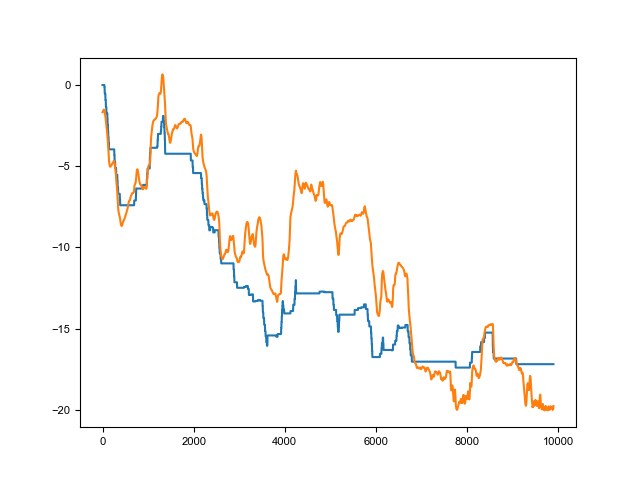

In [14]:
plt.figure()
plt.plot(fict_heading)
plt.plot(-phase)